In [8]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt


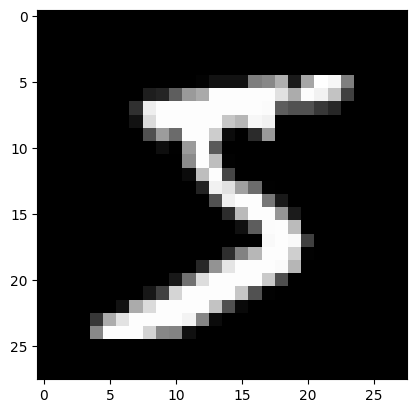

Label: 5


In [9]:

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display an example image
plt.imshow(X_train[0], cmap="gray")
plt.show()
print("Label:", y_train[0])

In [10]:
# Preprocess the data
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6, batch_size=200, verbose=2)

Epoch 1/6
300/300 - 42s - 141ms/step - accuracy: 0.8638 - loss: 0.4256 - val_accuracy: 0.9744 - val_loss: 0.0821
Epoch 2/6
300/300 - 38s - 127ms/step - accuracy: 0.9596 - loss: 0.1344 - val_accuracy: 0.9839 - val_loss: 0.0498
Epoch 3/6
300/300 - 43s - 144ms/step - accuracy: 0.9692 - loss: 0.0993 - val_accuracy: 0.9866 - val_loss: 0.0392
Epoch 4/6
300/300 - 43s - 145ms/step - accuracy: 0.9746 - loss: 0.0828 - val_accuracy: 0.9889 - val_loss: 0.0339
Epoch 5/6
300/300 - 44s - 146ms/step - accuracy: 0.9777 - loss: 0.0732 - val_accuracy: 0.9892 - val_loss: 0.0338
Epoch 6/6
300/300 - 43s - 142ms/step - accuracy: 0.9801 - loss: 0.0652 - val_accuracy: 0.9897 - val_loss: 0.0302


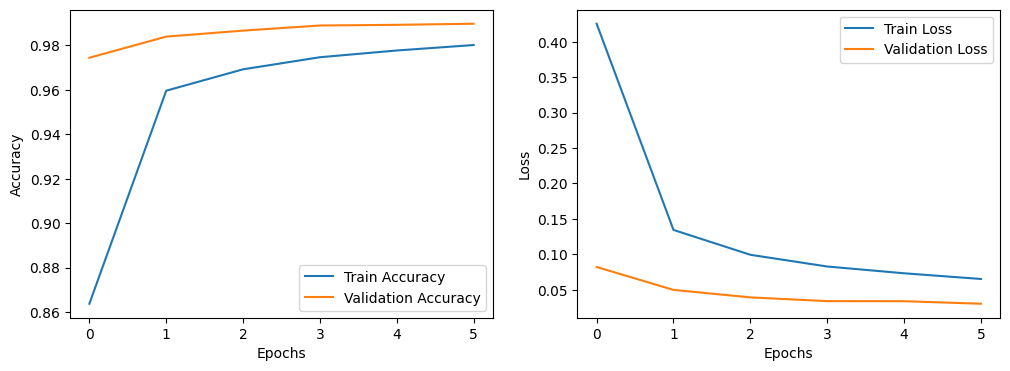

In [13]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

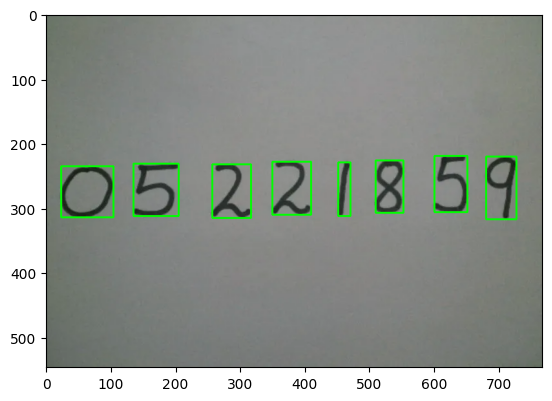

In [14]:
# Load and preprocess the image for digit prediction
image = cv2.imread(r"C:\\Users\billa\\OneDrive\\Pictures\\testt.webp")
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours from left to right
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

preprocessed_digits = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), color=(0, 255, 0), thickness=2)
    digit = thresh[y:y + h, x:x + w]
    resized_digit = cv2.resize(digit, (18, 18))
    padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)
    preprocessed_digits.append(padded_digit)

plt.imshow(image, cmap="gray")
plt.show()

In [15]:
# Predict digits and concatenate results into a single number string
predicted_number = ""
for digit in preprocessed_digits:
    digit = digit.reshape(1, 28, 28, 1)
    prediction = model.predict(digit)
    predicted_digit = np.argmax(prediction)
    predicted_number += str(predicted_digit)

print("Predicted number:", predicted_number)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted number: 05228859
